-------------

# <center> DIABETES PREDICTION SYSTEM  </center>

-----------

## <center> Importing the Dependencies </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings('ignore')

## <center> Data Collection and Analysis </center>

### PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# print last 5 rows of the dataset
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting some info about the data
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- 0 --> Non-Diabetic

- 1 --> Diabetic

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
# checking for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


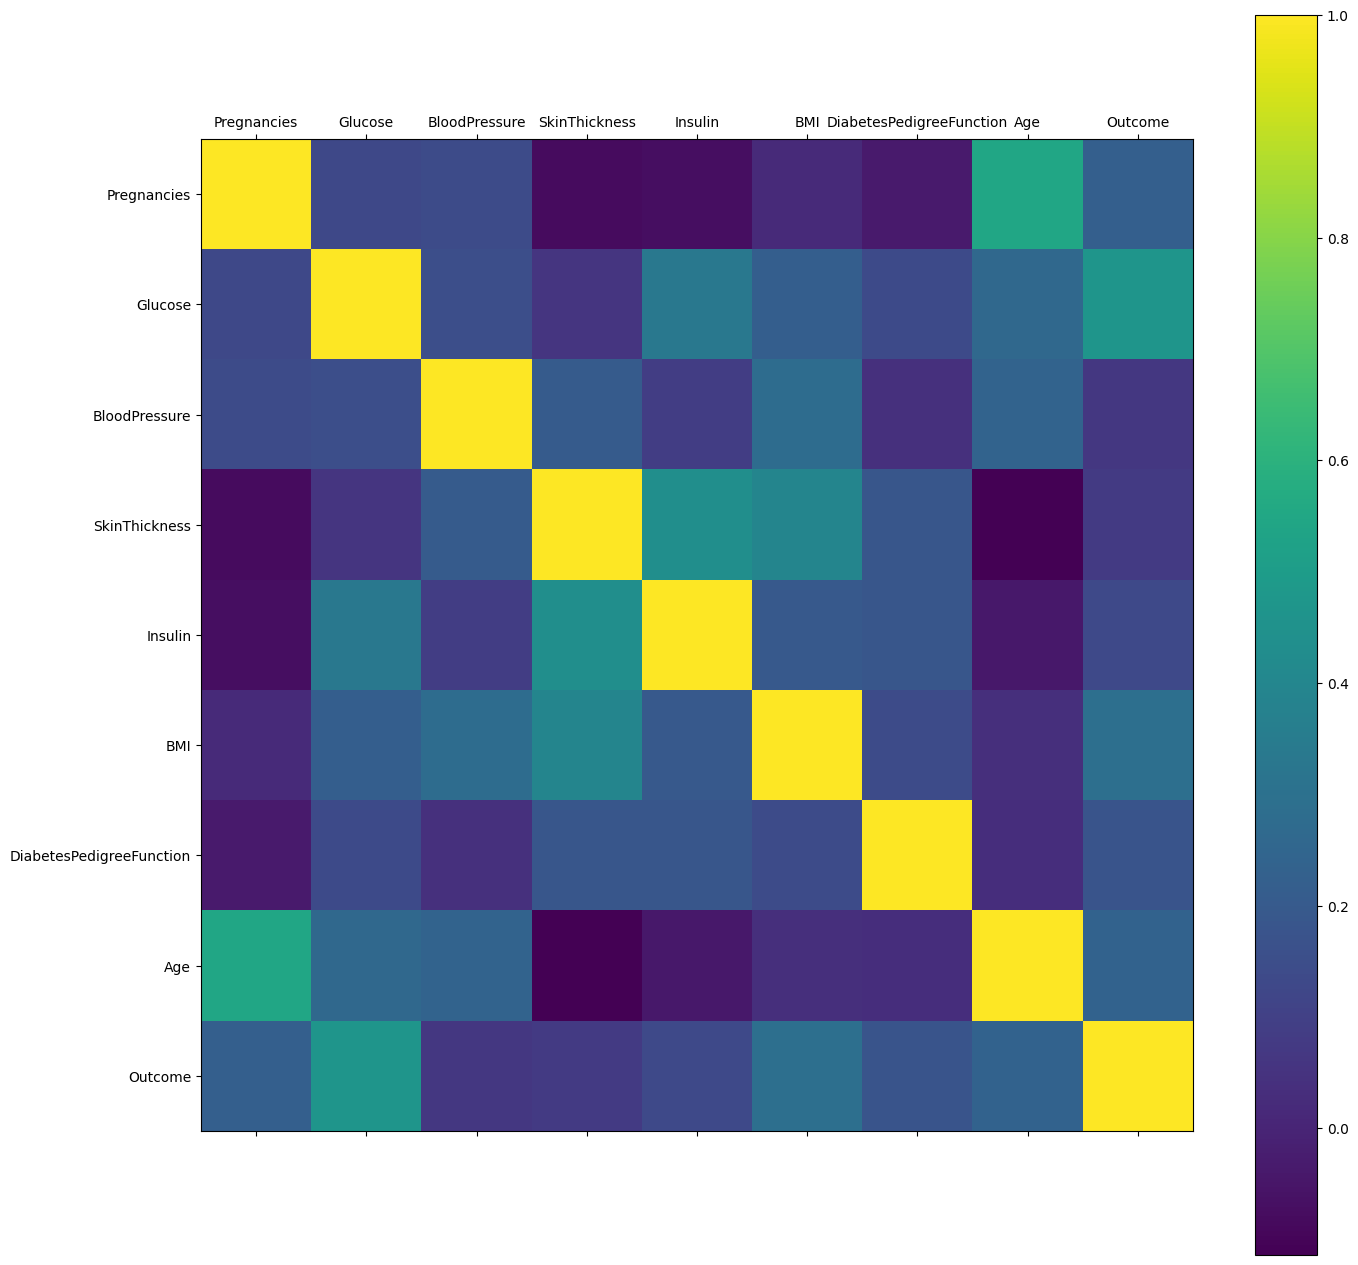

In [14]:
from matplotlib import rcParams
from matplotlib.pyplot import matshow

rcParams['figure.figsize'] = 10,18
plt.matshow(diabetes_dataset.corr())
plt.yticks(np.arange(diabetes_dataset.shape[1]), diabetes_dataset.columns)
plt.xticks(np.arange(diabetes_dataset.shape[1]), diabetes_dataset.columns)
plt.colorbar()

0    500
1    268
Name: Outcome, dtype: int64


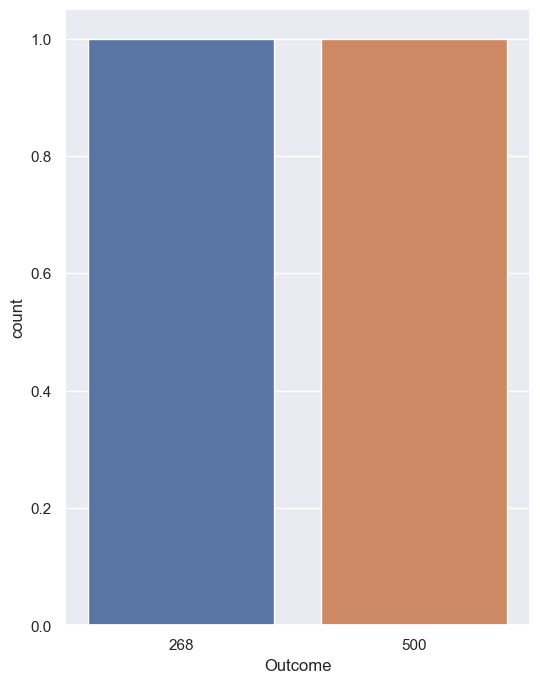

In [55]:
#data visualization for heart disease patients
y = diabetes_dataset["Outcome"]
outcome_temp = diabetes_dataset['Outcome'].value_counts()

rcParams['figure.figsize'] = 6,8
sns.countplot(x=outcome_temp)
print(outcome_temp)

- 0 --> Non-Diabetic

- 1 --> Diabetic

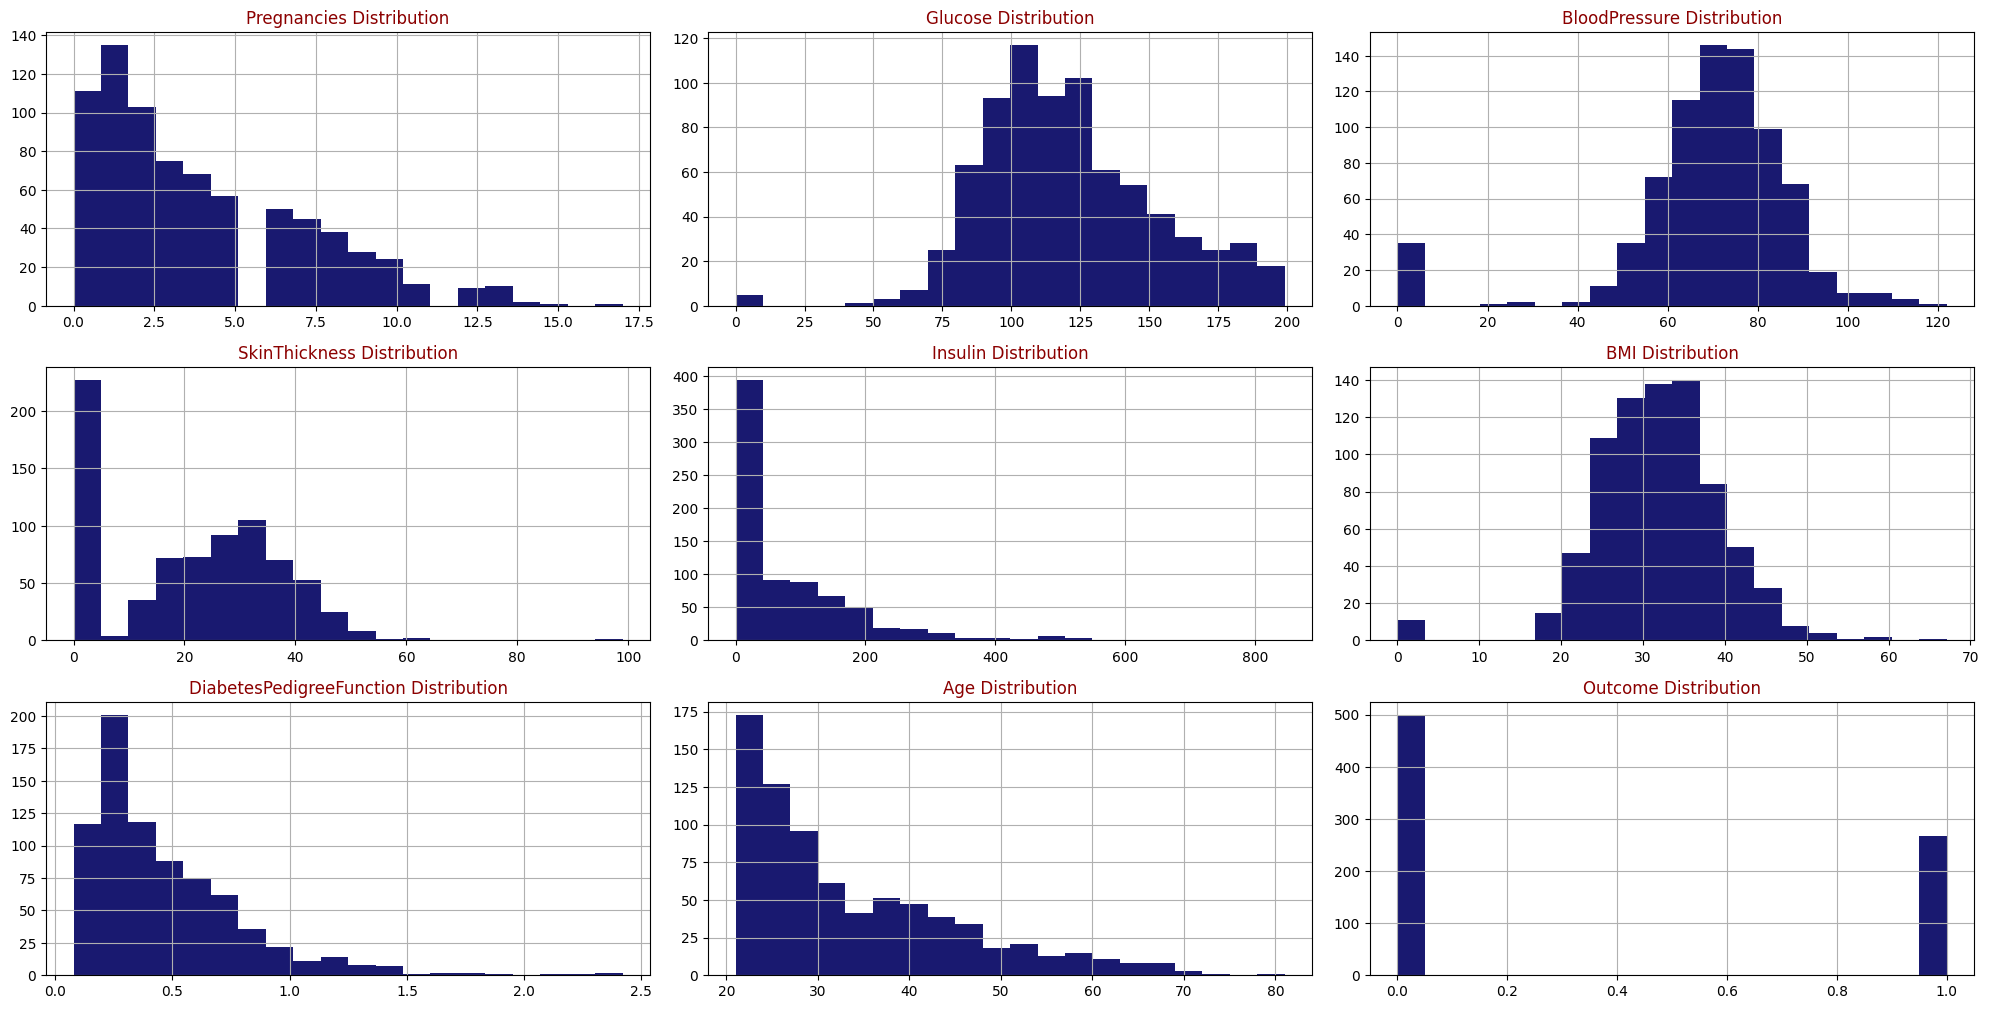

In [16]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(diabetes_dataset,diabetes_dataset.columns,6,3)

## <center> Splitting the Data into Training data & Test Data </center>

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# <center> Model Training </center>

## 1] Support Vector Machine

In [19]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)

SVC(kernel='linear')

In [20]:
Y_pred_svm = sv.predict(X_test)

## 2] Logistic Regression

In [21]:
model = LogisticRegression()

In [22]:
# training the LogisticRegression model with Training data
model.fit(X_train,Y_train)

LogisticRegression()

## 3] K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

## 4] Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

## 5] XGBoost

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

## <center> Model Evaluation </center>

### Accuracy Score and Classification Report

## 1] Support Vector Machine

In [26]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 77.27 %


In [27]:
# accuracy on train data
sv_train_prediction = sv.predict(X_train)
training_data_accuracy = accuracy_score(sv_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7833876221498371


In [28]:
# accuracy on test data
sv_test_prediction = sv.predict(X_test)
test_data_accuracy = accuracy_score(sv_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7727272727272727


In [29]:
# performance evaluation metrics
print(classification_report(sv_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



## 2] Logistic Regression

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7850162866449512


In [31]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7532467532467533


In [32]:
score_lr = round(accuracy_score(X_test_prediction, Y_test)*100,2)
print("The accuracy score achieved using Linear Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Linear Regression is: 75.32 %


In [33]:
# performance evaluation metrics
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       114
           1       0.52      0.70      0.60        40

    accuracy                           0.75       154
   macro avg       0.70      0.74      0.71       154
weighted avg       0.79      0.75      0.76       154



## 3] K Nearest Neighbors

In [34]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 75.32 %


In [35]:
# accuracy on train data
knn_train_prediction = sv.predict(X_train)
training_data_accuracy = accuracy_score(knn_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7833876221498371


In [36]:
# accuracy on test data
knn_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(knn_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7532467532467533


In [37]:
# performance evaluation metrics
print(classification_report(knn_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       114
           1       0.52      0.70      0.60        40

    accuracy                           0.75       154
   macro avg       0.70      0.74      0.71       154
weighted avg       0.79      0.75      0.76       154



## 4] Random Forest

In [38]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 77.92 %


In [39]:
# accuracy on train data
rf_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(rf_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [40]:
# accuracy on test data
rf_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7792207792207793


In [41]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       112
           1       0.57      0.74      0.65        42

    accuracy                           0.78       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.80      0.78      0.79       154



## 5] XGBoost

In [42]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 74.03 %


In [43]:
# accuracy on train data
xgb_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(xgb_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [44]:
# accuracy on test data
xgb_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(xgb_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7402597402597403


In [45]:
# performance evaluation metrics
print(classification_report(rf_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       112
           1       0.57      0.74      0.65        42

    accuracy                           0.78       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.80      0.78      0.79       154



In [46]:
scores = [score_svm,score_lr,score_knn,score_rf,score_xgb]
algorithms = ["Support Vector Machine","Linear Regression","K-Nearest Neighbors","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 77.27 %
The accuracy score achieved using Linear Regression is: 75.32 %
The accuracy score achieved using K-Nearest Neighbors is: 75.32 %
The accuracy score achieved using Random Forest is: 77.92 %
The accuracy score achieved using XGBoost is: 74.03 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

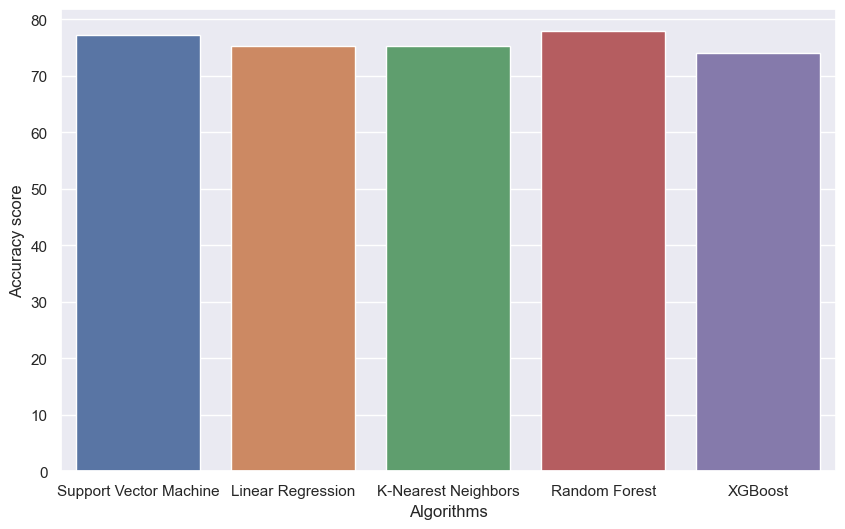

In [47]:
#data visualisation
sns.set(rc={'figure.figsize':(10,6)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

## <center> Building a Predictive System </center>

In [49]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = sv.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


## <center> Saving the trained model </center>

In [50]:
import pickle

In [51]:
filename = 'diabetes_model.sav'
pickle.dump(sv, open(filename, 'wb'))

In [52]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [53]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
